<a href="https://colab.research.google.com/github/fatmazaarour/AI-Workforce-Analysis/blob/main/AI_Jobs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
from google.colab import files
import pandas as pd
import io



In [ ]:
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['ai_impact_jobs_2010_2025.csv']))

Saving ai_impact_jobs_2010_2025.csv to ai_impact_jobs_2010_2025.csv


In [ ]:
print(df.head())

                                 job_id  posting_year country         region  \
0  836b4774-702e-49ef-93d3-2f255ce1e910          2018  Brazil  South America   
1  43699e93-7b15-4728-a4c6-9e41ff438a25          2015     UAE    Middle East   
2  fc9d1854-3cbf-4bab-90df-77304dfc59df          2016   Nepal     South Asia   
3  05c1c7d3-2add-4919-91eb-f6c78bfe23d1          2015   Spain         Europe   
4  5e739937-d1b0-44d7-935c-7ebb3fc1f6e8          2014  Taiwan      East Asia   

        city          company_name company_size       industry  \
0     London  NextGen Technologies        Small      Education   
1  Singapore      Future Solutions       Medium         Energy   
2     Sydney      Future Analytics      Startup        Finance   
3    Nairobi   Global Technologies        Large     Government   
4     Sydney   Future Technologies        Small  Manufacturing   

         job_title seniority_level  ...  ai_intensity_score  \
0   Policy Analyst            Lead  ...                0.81

In [ ]:
# 1. Clean data: Check for nulls and drop if necessary
df_clean = df.dropna()

In [ ]:
print(f'📊 Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns')
print(f'📅 Year Range: {df["posting_year"].min()} - {df["posting_year"].max()}')
print(f'🌍 Countries: {df["country"].nunique()}')
print(f'🏭 Industries: {df["industry"].nunique()}')
df.head()

📊 Dataset Shape: 5,000 rows × 22 columns
📅 Year Range: 2010 - 2025
🌍 Countries: 44
🏭 Industries: 9


,job_id,posting_year,country,region,city,company_name,company_size,industry,job_title,seniority_level,...,ai_intensity_score,core_skills,ai_skills,salary_usd,salary_change_vs_prev_year_percent,automation_risk_score,reskilling_required,ai_job_displacement_risk,job_description_embedding_cluster,industry_ai_adoption_stage
0,836b4774-702e-49ef-93d3-2f255ce1e910,2018,Brazil,South America,London,NextGen Technologies,Small,Education,Policy Analyst,Lead,...,0.81,"Research, Project Management, Business Analysis",reinforcement learning,61586,12.68,0.11,True,Low,14,Growing
1,43699e93-7b15-4728-a4c6-9e41ff438a25,2015,UAE,Middle East,Singapore,Future Solutions,Medium,Energy,Data Scientist,Executive,...,0.04,"Research, SQL, Business Analysis, Python, Clou...",NaN,62045,-3.98,0.71,False,High,19,Emerging
2,fc9d1854-3cbf-4bab-90df-77304dfc59df,2016,Nepal,South Asia,Sydney,Future Analytics,Startup,Finance,Product Manager,Junior,...,0.15,"Statistics, Project Management, Cloud Computin...",NaN,27035,3.55,0.86,False,High,2,Emerging
3,05c1c7d3-2add-4919-91eb-f6c78bfe23d1,2015,Spain,Europe,Nairobi,Global Technologies,Large,Government,Data Scientist,Mid,...,0.19,"Cloud Computing, SQL, Project Management, Comm...",NaN,72894,-2.80,0.70,False,Low,15,Emerging
4,5e739937-d1b0-44d7-935c-7ebb3fc1f6e8,2014,Taiwan,East Asia,Sydney,Future Technologies,Small,Manufacturing,ML Engineer,Lead,...,0.11,"SQL, Python, Communication, Software Engineeri...",NaN,57215,0.85,0.87,False,High,13,Emerging


 Data Info & Missing **Values**

In [ ]:
print(df.dtypes)

job_id                                 object
posting_year                            int64
country                                object
region                                 object
city                                   object
company_name                           object
company_size                           object
industry                               object
job_title                              object
seniority_level                        object
ai_mentioned                             bool
ai_keywords                            object
ai_intensity_score                    float64
core_skills                            object
ai_skills                              object
salary_usd                              int64
salary_change_vs_prev_year_percent    float64
automation_risk_score                 float64
reskilling_required                      bool
ai_job_displacement_risk               object
job_description_embedding_cluster       int64
industry_ai_adoption_stage        

In [ ]:
print(df.isnull().sum()[df.isnull().sum() > 0])

ai_keywords    3377
ai_skills      3377
dtype: int64


In [ ]:
# Statistical Summary
df.describe()

,posting_year,ai_intensity_score,salary_usd,salary_change_vs_prev_year_percent,automation_risk_score,job_description_embedding_cluster
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,2017.519400,0.287312,63096.18480,3.015192,0.586176,9.473000
std,4.638569,0.291377,31431.27151,5.968729,0.250007,5.748763
min,2010.000000,0.000000,15321.00000,-5.000000,0.100000,0.000000
25%,2013.000000,0.070000,36575.50000,-1.580000,0.330000,4.000000
50%,2017.000000,0.150000,60909.50000,1.720000,0.670000,10.000000
75%,2022.000000,0.520000,81811.75000,5.385000,0.790000,14.000000
max,2025.000000,0.950000,161547.00000,17.980000,0.900000,19.000000


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Calculate KPIs
total_jobs = len(df)
ai_adoption_rate = df['ai_mentioned'].mean() * 100
avg_salary = df['salary_usd'].mean()
avg_risk = df['automation_risk_score'].mean()
countries = df['country'].nunique()
industries = df['industry'].nunique()

# Create Dashboard
fig = make_subplots(
    rows=3, cols=3,
    specs=[
        [{"type": "indicator"}, {"type": "indicator"}, {"type": "indicator"}],
        [{"type": "indicator"}, {"type": "indicator"}, {"type": "indicator"}],
        [{"type": "pie", "colspan": 1}, {"type": "bar", "colspan": 2}, None]
    ],
    subplot_titles=['', '', '', '', '', '', 'Industry Distribution', 'Top 10 Countries by Job Count']
)

# Add KPI Indicators
fig.add_trace(go.Indicator(
    mode="number",
    value=total_jobs,
    title={"text": "📊 Total Jobs"},
    number={"font": {"size": 40, "color": "#3498db"}}
), row=1, col=1)

fig.add_trace(go.Indicator(
    mode="number+delta",
    value=ai_adoption_rate,
    title={"text": "🤖 AI Adoption Rate (%)"},
    number={"suffix": "%", "font": {"size": 40, "color": "#27ae60"}},
    delta={"reference": 50}
), row=1, col=2)

fig.add_trace(go.Indicator(
    mode="number",
    value=avg_salary,
    title={"text": "💰 Avg Salary (USD)"},
    number={"prefix": "$", "font": {"size": 40, "color": "#f39c12"}}
), row=1, col=3)

fig.add_trace(go.Indicator(
    mode="gauge+number",
    value=avg_risk,
    title={"text": "⚠️ Avg Automation Risk"},
    gauge={"axis": {"range": [0, 100]}, "bar": {"color": "#e74c3c"}}
), row=2, col=1)

fig.add_trace(go.Indicator(
    mode="number",
    value=countries,
    title={"text": "🌍 Countries"},
    number={"font": {"size": 40, "color": "#9b59b6"}}
), row=2, col=2)

fig.add_trace(go.Indicator(
    mode="number",
    value=industries,
    title={"text": "🏭 Industries"},
    number={"font": {"size": 40, "color": "#1abc9c"}}
), row=2, col=3)

# Industry Pie Chart
industry_counts = df['industry'].value_counts()
fig.add_trace(go.Pie(
    labels=industry_counts.index,
    values=industry_counts.values,
    hole=0.4
), row=3, col=1)

# Top Countries Bar Chart
country_counts = df['country'].value_counts().head(10)
fig.add_trace(go.Bar(
    x=country_counts.index,
    y=country_counts.values,
    marker_color='#3498db'
), row=3, col=2)

fig.update_layout(
    height=900,
    title_text="📈 AI WORKFORCE REVOLUTION 2025 - EXECUTIVE DASHBOARD",
    title_font_size=22,
    showlegend=False
)
fig.show()
fig.show(renderer='iframe')

In [ ]:
import plotly.express as px

# Animated Bar Chart - AI Adoption by Industry Over Years
industry_year = df.groupby(['posting_year', 'industry'])['ai_mentioned'].mean().reset_index()
industry_year['ai_mentioned'] = industry_year['ai_mentioned'] * 100

fig = px.bar(industry_year,
             x='ai_mentioned',
             y='industry',
             animation_frame='posting_year',
             orientation='h',
             color='industry',
             title='🏭 AI Adoption by Industry Over Time (2010-2025)',
             labels={'ai_mentioned': 'AI Adoption Rate (%)', 'industry': 'Industry'},
             range_x=[0, 100],
             color_discrete_sequence=px.colors.qualitative.Set2)

fig.update_layout(
    height=600,
    showlegend=False,
    font=dict(size=12),
    title_font_size=18
)
fig.show()
fig.show(renderer='iframe')

Text(0, 0.5, 'salary in dollar')

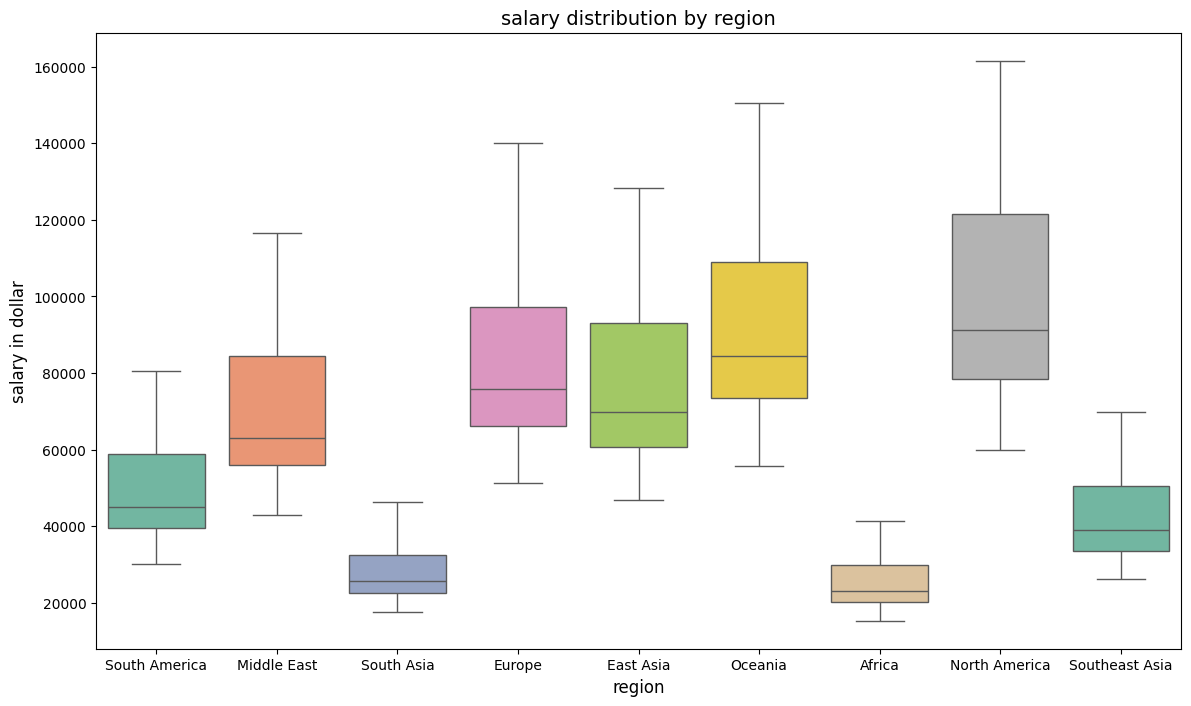

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='region', y='salary_usd', palette='Set2', hue='region')

plt.title('salary distribution by region', fontsize=14)
plt.xlabel('region', fontsize=12)
plt.ylabel('salary in dollar', fontsize=12)

Text(0, 0.5, 'region ko sample')

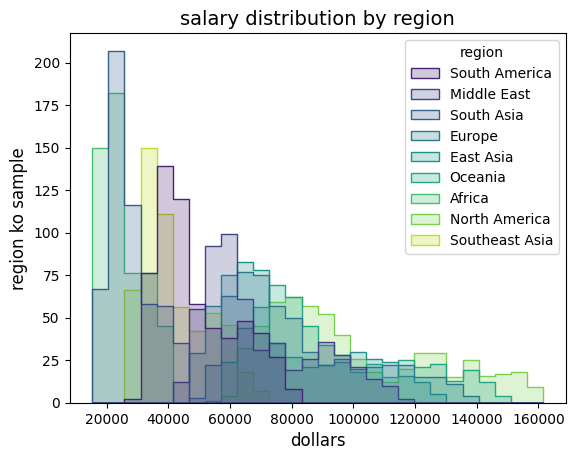

In [ ]:
sns.histplot(data=df, x='salary_usd', element="step", palette='viridis', hue='region')

plt.title('salary distribution by region', fontsize=14)
plt.xlabel('dollars', fontsize=12)
plt.ylabel('region ko sample', fontsize=12)

In [ ]:
# --- Prepare data ---
maturity = (
    df.groupby("industry_ai_adoption_stage")
    .size()
    .reset_index(name="count")
)

# --- Create professional pie chart ---
fig = px.pie(
    maturity,
    values="count",
    names="industry_ai_adoption_stage",
    title="Distribution of Industry AI Adoption Stages",
    color_discrete_sequence=px.colors.qualitative.Set2,
    hover_data={"count": True},
)

# --- Customize layout ---
fig.update_traces(
    textinfo="percent+label",  # Show both percent and stage
    textfont_size=14,
    pull=[0.05]*len(maturity),  # Slightly pull out all slices
    marker=dict(line=dict(color="#FFFFFF", width=2))
)

fig.update_layout(
    title=dict(
        text="Distribution of Industry AI Adoption Stages",
        x=0.5, xanchor="center",
        font=dict(size=20, family="Arial", color="#222222")
    ),
    legend_title_text="AI Adoption Stage",
    margin=dict(l=40, r=40, t=80, b=40)
)

fig.show()

In [ ]:
fig = px.box(
    df,
    x="ai_mentioned",
    y="salary_usd",
    color="ai_mentioned",
    title="Salary Distribution: AI vs Non-AI Roles",
    labels={"ai_mentioned": "", "salary_usd": "Annual Salary (USD)"},
    color_discrete_sequence=["#ff7f0e", "#2ca02c"]
)

fig.show()

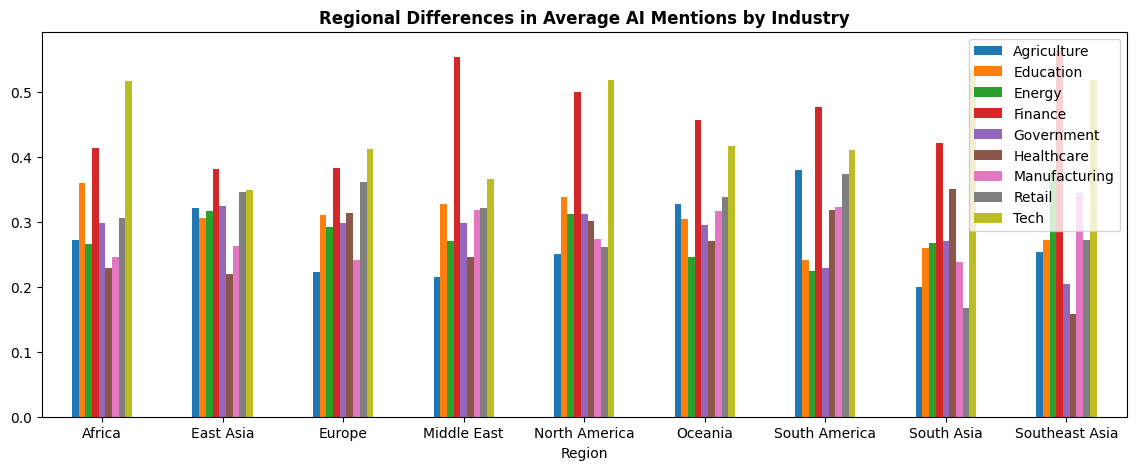

In [ ]:
# Bar chart of regional AI mention differences
pivot4 = df.groupby(['region', 'industry'])['ai_mentioned'].mean().unstack()
pivot4.plot(kind='bar', figsize=(14, 5))
plt.xticks(rotation=360)
plt.legend(loc='upper right')
plt.xlabel('Region')
plt.title('Regional Differences in Average AI Mentions by Industry', fontweight='bold')
plt.show()

In [ ]:
# Animated Choropleth Map - AI Intensity by Country Over Years
country_year = df.groupby(['posting_year', 'country'])['ai_intensity_score'].mean().reset_index()

fig = px.choropleth(country_year,
                    locations='country',
                    locationmode='country names',
                    color='ai_intensity_score',
                    animation_frame='posting_year',
                    title='🌍 Global AI Intensity Score Evolution (2010-2025)',
                    color_continuous_scale='Viridis',
                    range_color=[0, 100])

fig.update_layout(
    height=600,
    geo=dict(showframe=False, showcoastlines=True),
    title_font_size=18
)
fig.show()
fig.show(renderer='iframe')

In [ ]:
 #Animated Scatter - Salary vs AI Intensity by Year
scatter_data = df.groupby(['posting_year', 'industry']).agg({
    'salary_usd': 'mean',
    'ai_intensity_score': 'mean',
    'job_id': 'count'
}).reset_index()
scatter_data.columns = ['Year', 'Industry', 'Avg Salary', 'AI Intensity', 'Job Count']

fig = px.scatter(scatter_data,
                 x='AI Intensity',
                 y='Avg Salary',
                 size='Job Count',
                 color='Industry',
                 animation_frame='Year',
                 title='💰 Salary vs AI Intensity by Industry (Animated)',
                 size_max=50,
                 range_x=[0, 100],
                 range_y=[0, 200000])

fig.update_layout(height=600, title_font_size=18)
fig.show()
fig.show(renderer='iframe')

/tmp/ipython-input-680232600.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-680232600.py:16: UserWarning:

Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.

/tmp/ipython-input-680232600.py:16: UserWarning:

Glyph 128188 (\N{BRIEFCASE}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128188 (\N{BRIEFCASE}) missing from font(s) DejaVu Sans.



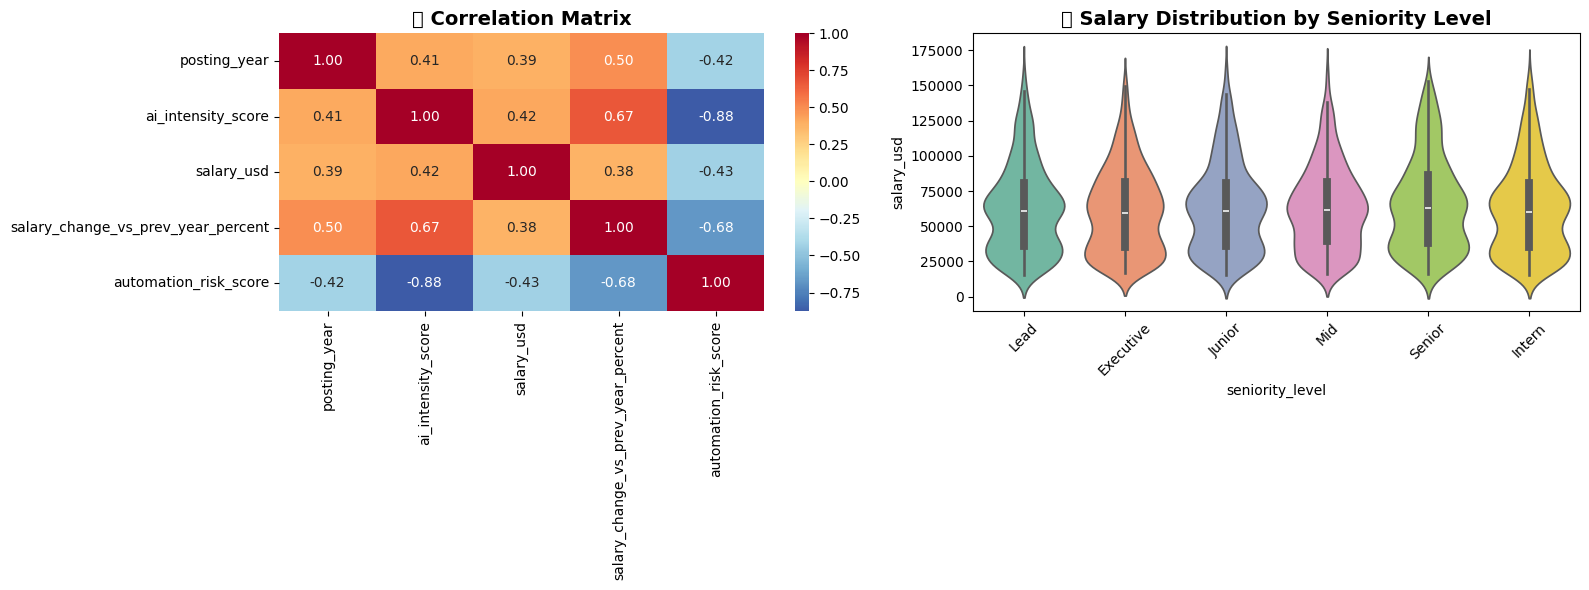

In [ ]:
# Correlation Heatmap
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Correlation Matrix
numeric_cols = ['posting_year', 'ai_intensity_score', 'salary_usd',
                'salary_change_vs_prev_year_percent', 'automation_risk_score']
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='RdYlBu_r', center=0, ax=axes[0], fmt='.2f')
axes[0].set_title('🔗 Correlation Matrix', fontsize=14, fontweight='bold')

# Violin Plot - Salary by Seniority
sns.violinplot(data=df, x='seniority_level', y='salary_usd', ax=axes[1], palette='Set2')
axes[1].set_title('💼 Salary Distribution by Seniority Level', fontsize=14, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

/tmp/ipython-input-3421599934.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-3421599934.py:15: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.



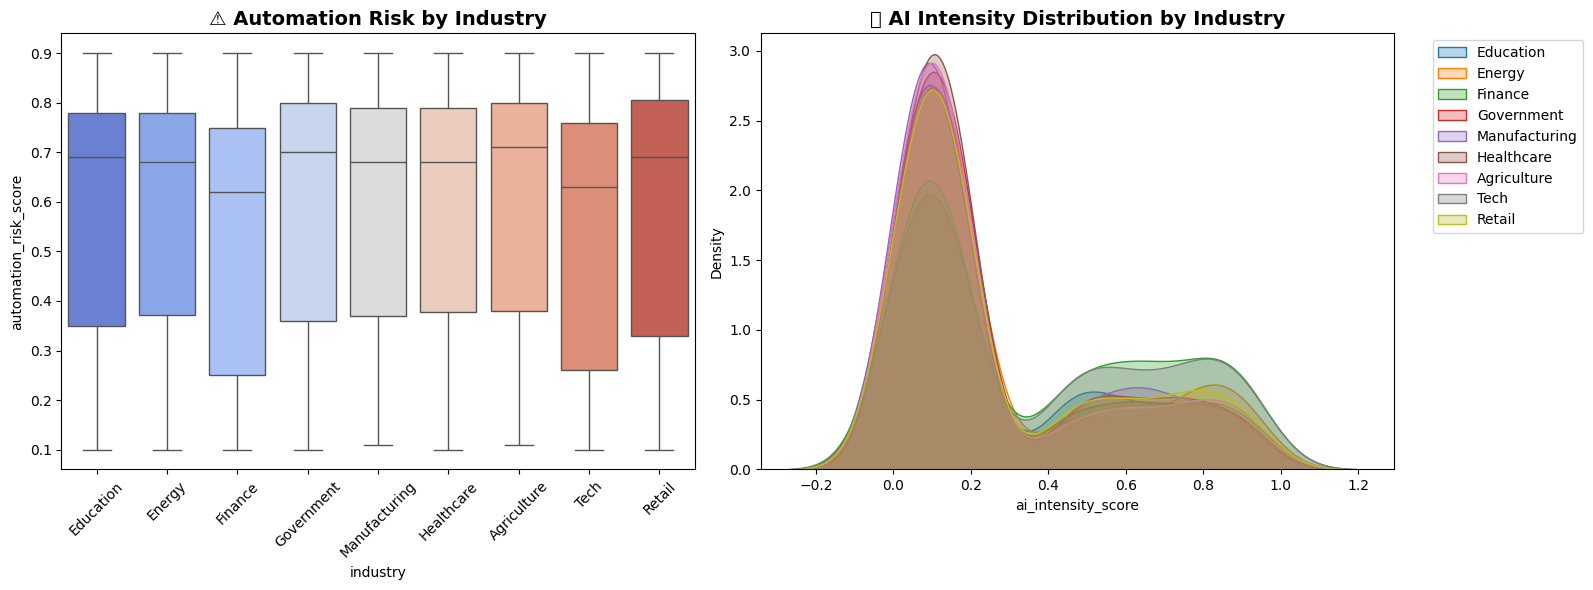

In [ ]:
# Box Plot - Automation Risk by Industry
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(data=df, x='industry', y='automation_risk_score', ax=axes[0], palette='coolwarm')
axes[0].set_title('⚠️ Automation Risk by Industry', fontsize=14, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)

# KDE Plot - AI Intensity Score
for industry in df['industry'].unique():
    subset = df[df['industry'] == industry]
    sns.kdeplot(data=subset, x='ai_intensity_score', ax=axes[1], label=industry, fill=True, alpha=0.3)
axes[1].set_title('📊 AI Intensity Distribution by Industry', fontsize=14, fontweight='bold')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# Sunburst Chart - Industry/Region Hierarchy
sunburst_data = df.groupby(['industry', 'region']).size().reset_index(name='count')

fig = px.sunburst(sunburst_data,
                  path=['industry', 'region'],
                  values='count',
                  title='🌐 Job Distribution: Industry → Region Hierarchy',
                  color='count',
                  color_continuous_scale='Blues')

fig.update_layout(height=700, title_font_size=18)
fig.show()
fig.show(renderer='iframe')


In [ ]:
# Sankey Diagram - Job Flow: Seniority → Industry → AI Risk
sankey_data = df.groupby(['seniority_level', 'industry', 'ai_job_displacement_risk']).size().reset_index(name='count')
sankey_data = sankey_data.head(50)  # Limit for clarity

# Create node labels
all_nodes = list(sankey_data['seniority_level'].unique()) + \
            list(sankey_data['industry'].unique()) + \
            list(sankey_data['ai_job_displacement_risk'].unique())
node_dict = {node: i for i, node in enumerate(all_nodes)}

# Create links
source1 = [node_dict[x] for x in sankey_data['seniority_level']]
target1 = [node_dict[x] for x in sankey_data['industry']]
source2 = [node_dict[x] for x in sankey_data['industry']]
target2 = [node_dict[x] for x in sankey_data['ai_job_displacement_risk']]

fig = go.Figure(go.Sankey(
    node=dict(label=all_nodes, color='rgba(52, 152, 219, 0.8)'),
    link=dict(
        source=source1 + source2,
        target=target1 + target2,
        value=list(sankey_data['count']) * 2
    )
))

fig.update_layout(
    title='🔄 Job Flow: Seniority → Industry → AI Displacement Risk',
    height=600,
    title_font_size=18
)
fig.show()
fig.show(renderer='iframe')

In [ ]:
# Storytelling Visualization - Timeline of AI Evolution
yearly_stats = df.groupby('posting_year').agg({
    'ai_mentioned': 'mean',
    'salary_usd': 'mean',
    'automation_risk_score': 'mean',
    'ai_intensity_score': 'mean'
}).reset_index()
yearly_stats['ai_mentioned'] = yearly_stats['ai_mentioned'] * 100

fig = make_subplots(rows=2, cols=2,
                    subplot_titles=['AI Adoption Rate Over Time', 'Average Salary Trend',
                                   'Automation Risk Evolution', 'AI Intensity Growth'])

fig.add_trace(go.Scatter(x=yearly_stats['posting_year'], y=yearly_stats['ai_mentioned'],
                         mode='lines+markers', name='AI Adoption %', line=dict(color='#3498db', width=3)),
              row=1, col=1)

fig.add_trace(go.Scatter(x=yearly_stats['posting_year'], y=yearly_stats['salary_usd'],
                         mode='lines+markers', name='Avg Salary', line=dict(color='#27ae60', width=3)),
              row=1, col=2)

fig.add_trace(go.Scatter(x=yearly_stats['posting_year'], y=yearly_stats['automation_risk_score'],
                         mode='lines+markers', name='Risk Score', line=dict(color='#e74c3c', width=3)),
              row=2, col=1)

fig.add_trace(go.Scatter(x=yearly_stats['posting_year'], y=yearly_stats['ai_intensity_score'],
                         mode='lines+markers', name='AI Intensity', line=dict(color='#9b59b6', width=3)),
              row=2, col=2)

fig.update_layout(height=700, title_text='📈 15 Years of AI Impact on Jobs', showlegend=False)
fig.show()
fig.show(renderer='iframe')


In [ ]:
# Top In-Demand Jobs Analysis
top_jobs = df.groupby('job_title').agg({
    'salary_usd': 'mean',
    'ai_intensity_score': 'mean',
    'job_id': 'count'
}).reset_index()
top_jobs.columns = ['Job Title', 'Avg Salary', 'AI Intensity', 'Job Count']
top_jobs = top_jobs.sort_values('Job Count', ascending=False).head(15)

fig = px.bar(top_jobs, x='Job Count', y='Job Title', orientation='h',
             color='Avg Salary', color_continuous_scale='Greens',
             title='🔥 Top 15 Most In-Demand AI-Related Jobs',
             hover_data=['AI Intensity'])
fig.update_layout(height=600, yaxis={'categoryorder':'total ascending'})
fig.show()
fig.show(renderer='iframe')

In [ ]:
# Highest Paying AI Jobs
high_paying = df.groupby('job_title')['salary_usd'].mean().sort_values(ascending=False).head(10)

fig = px.bar(x=high_paying.values, y=high_paying.index, orientation='h',
             title='💰 Top 10 Highest Paying AI-Related Positions',
             labels={'x': 'Average Salary (USD)', 'y': 'Job Title'},
             color=high_paying.values, color_continuous_scale='Oranges')
fig.update_layout(height=500, yaxis={'categoryorder':'total ascending'})
fig.show()
fig.show(renderer='iframe')

In [ ]:
# Skills Analysis - Most Valuable AI Skills
ai_skills = df['ai_skills'].dropna().str.split(', ').explode()
skill_counts = ai_skills.value_counts().head(20)

fig = px.treemap(names=skill_counts.index, parents=['AI Skills']*len(skill_counts),
                 values=skill_counts.values,
                 title='🛠️ Most Valuable AI Skills in Job Market',
                 color=skill_counts.values, color_continuous_scale='Blues')
fig.update_layout(height=600)
fig.show()
fig.show(renderer='iframe')


In [ ]:
# Prepare data for prediction
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# Historical data aggregation
yearly_data = df.groupby('posting_year').agg({
    'ai_mentioned': 'mean',
    'salary_usd': 'mean',
    'automation_risk_score': 'mean',
    'ai_intensity_score': 'mean'
}).reset_index()

yearly_data['ai_mentioned'] = yearly_data['ai_mentioned'] * 100

# Prepare future years
future_years = np.array([2026, 2027, 2028, 2029, 2030]).reshape(-1, 1)
historical_years = yearly_data['posting_year'].values.reshape(-1, 1)

# Predictions dictionary
predictions = {'Year': [2026, 2027, 2028, 2029, 2030]}

for col in ['ai_mentioned', 'salary_usd', 'automation_risk_score', 'ai_intensity_score']:
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(historical_years)
    model = LinearRegression()
    model.fit(X_poly, yearly_data[col].values)

    future_poly = poly.transform(future_years)
    predictions[col] = model.predict(future_poly)

predictions_df = pd.DataFrame(predictions)
predictions_df.columns = ['Year', 'AI Adoption (%)', 'Avg Salary (USD)', 'Automation Risk', 'AI Intensity']

print('📈 Predicted Job Market Trends (2026-2030):')
predictions_df

📈 Predicted Job Market Trends (2026-2030):


,Year,AI Adoption (%),Avg Salary (USD),Automation Risk,AI Intensity
0,2026,84.471277,89387.877425,0.327323,0.582321
1,2027,93.859364,93442.075319,0.281285,0.634720
2,2028,103.790017,97655.283272,0.232662,0.690055
3,2029,114.263238,102027.501286,0.181453,0.748327
4,2030,125.279024,106558.729361,0.127659,0.809535


In [ ]:
# Visualization of Predictions
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=['AI Adoption Rate Forecast', 'Salary Trend Forecast',
                                   'Automation Risk Forecast', 'AI Intensity Forecast'])

colors = ['#3498db', '#27ae60', '#e74c3c', '#9b59b6']
cols = ['AI Adoption (%)', 'Avg Salary (USD)', 'Automation Risk', 'AI Intensity']
hist_cols = ['ai_mentioned', 'salary_usd', 'automation_risk_score', 'ai_intensity_score']

for i, (col, hist_col) in enumerate(zip(cols, hist_cols)):
    row, c = (i // 2) + 1, (i % 2) + 1

    # Historical
    fig.add_trace(go.Scatter(
        x=yearly_data['posting_year'], y=yearly_data[hist_col],
        mode='lines+markers', name=f'{col} (Historical)',
        line=dict(color=colors[i], width=2)
    ), row=row, col=c)

    # Predicted
    fig.add_trace(go.Scatter(
        x=predictions_df['Year'], y=predictions_df[col],
        mode='lines+markers', name=f'{col} (Predicted)',
        line=dict(color=colors[i], width=2, dash='dash')
    ), row=row, col=c)

fig.update_layout(height=700, title_text='🔮 Job Market Predictions 2026-2030', showlegend=False)
fig.show()
fig.show(renderer='iframe')

In [ ]:
# Predicted Growth Visualization
future_jobs = pd.DataFrame({
    'Position': ['AI/ML Engineer', 'Data Scientist', 'Prompt Engineer', 'AI Ethics Officer',
                 'MLOps Engineer', 'Computer Vision Engineer', 'NLP Specialist',
                 'Robotics Engineer', 'AI Product Manager', 'Data Engineer'],
    'Expected Growth (%)': [45, 38, 120, 85, 55, 40, 50, 35, 42, 30],
    'Avg Salary 2030 (USD)': [180000, 165000, 145000, 140000, 155000, 150000, 148000, 135000, 160000, 130000]
})

fig = px.scatter(future_jobs, x='Expected Growth (%)', y='Avg Salary 2030 (USD)',
                 size='Expected Growth (%)', color='Position',
                 title='🚀 Future Job Opportunities: Growth vs Salary (2030)',
                 hover_data=['Position'])
fig.update_layout(height=600)
fig.show()
fig.show(renderer='iframe')